# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

C:\Users\Arpan-PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Arpan-PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Arpan-PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Arpan-PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWa

Using TensorFlow 1.10.0


# Task 2: Rotation

In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40
)

<class 'numpy.ndarray'>


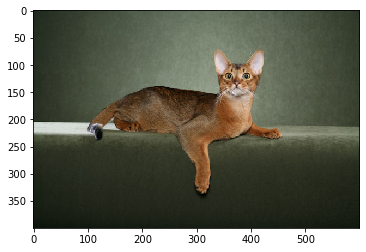

In [50]:
image_path = 'images/train/cat/cat.jpg'

img_as_array = plt.imread(image_path)
print(type(img_as_array))
plt.imshow(img_as_array);

Found 1 images belonging to 1 classes.
<class 'numpy.ndarray'>
(1, 256, 256, 3)
<class 'numpy.ndarray'>
(1, 1)


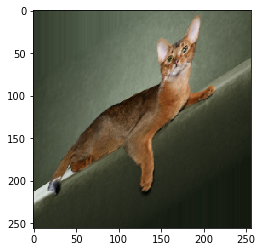

In [30]:
x, y = next(generator.flow_from_directory('images', batch_size=4))
print(type(x))
print(x.shape)
print(type(y))
print(y.shape)
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [21]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-100,-50,0,50,100],height_shift_range=[-50,0,50]
)

Found 1 images belonging to 1 classes.


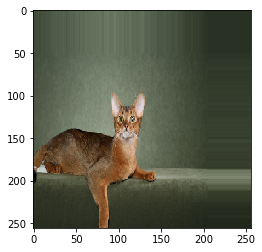

In [22]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


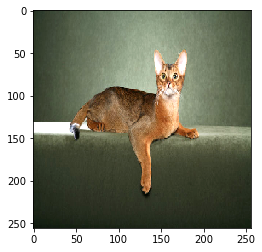

In [28]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0.5,2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


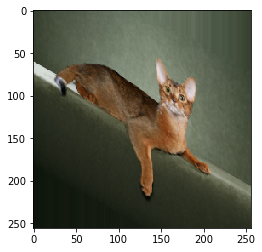

In [29]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


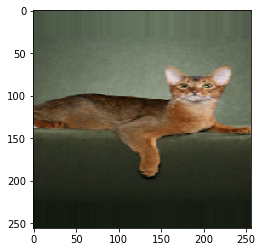

In [32]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=[0.5,1.3]
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.
(1, 256, 256, 3)
151.442
151.442
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
69.57810416666666


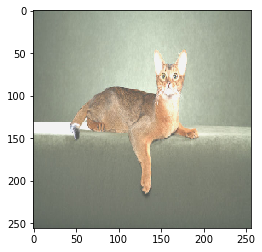

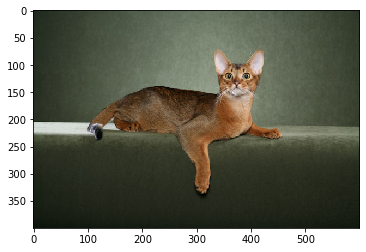

In [54]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
print(x.shape)
print(x[0].mean())
print(x.mean())
plt.figure()
plt.imshow(x[0].astype('uint8'));


img = Image.open(image_path)
print(type(img))
img = np.array(img)
print(type(img))
print(img.mean())
plt.figure()
plt.imshow(img)

# Task 8: Flips

Found 1 images belonging to 1 classes.


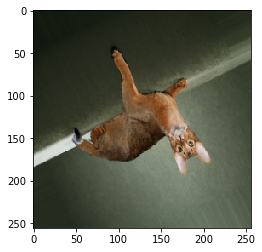

In [56]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range = 30
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 51s 0us/step


In [3]:
#THIS IS NORMALIZATION FOR IMAGE AS A WHOLE, I.E, MEAN AND STD_DEV IS TAKEN OVER ALL THE
#PIXELS AS IDENTICAL

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

x_mean = np.mean(x_train)
print("X mean =",x_mean)
x_std = np.std(x_train)
print("X std=",x_std)
x_train_norm = (x_train - x_mean)/x_std
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    featurewise_center=True,    #subtracting mean
    featurewise_std_normalization=True       #scaling by std deviation
)

generator.fit(x_train)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
X mean = 120.70756512369792
X std= 64.1500758911213


In [69]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

0.895711 0.74181825 [[8]]


### Samplewise

In [4]:
#THIS IS PIXELWISE NORMALISATION, I.E, FOR 500 IMAGES OF 256 x 256 resolution, mean and std_dev
#would be calculated np.power(256,2) times separately, over 500 images for each mean and each standard deviation



generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center = True,
    samplewise_std_normalization = True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-4.9670536e-08 1.0 [[6]]


# Task 10: Rescale and Preprocessing Function

In [79]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.,
    preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input
)     

In [80]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [81]:
print(x.mean(), x.std(), y)

0.5972886 0.50507224 [[1]]


# Task 11: Using in Model Training

In [82]:
# Your code here
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale=1.,
    preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip = True,
    rotation_range = 20
)

In [85]:
# Your code here

#LITERALLY JUST COPIED AND TYPED


model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top = False, input_shape = (32,32,3),
        pooling='avg'    
    ),
    tf.keras.layers.Dense(10,activation='softmax')   #since there are 10 categories for CIFAR-10 dataset, which need to be labelled in terms of probability                        
])
model.compile(
    loss = 'sparse_categorical_crossentropy',     #need to google this
    optimizer='adam',              
    metrics=['accuracy']
)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 0s 0us/step


In [86]:
model = model.fit(
      generator.flow(x_train,y_train), epochs = 1, steps_per_epoch=10
)

  ...
    to  
  ['...']
Train for 10 steps
10/10 [==============================] - 14s 1s/step - loss: 3.3691 - accuracy: 0.1531
